In [1037]:
# External Imports
import folium
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
import shapely
from shapely.geometry import Polygon,Point

# Core Imports
import json
import os.path as path
import sys
from collections import namedtuple

# Internal Imports
sys.path.append("/driptorch")
import driptorch as dt

from driptorch.firing import flank
print(flank.__file__)


# Define burn unit spatial data in GeoJSON format
geojson_1 = json.loads('{"type": "FeatureCollection", "features": [{"id": "8", "type": "Feature", "properties": {"Acres": 84, "FACTSsize": 83.951, "FY_Schedul": "FY23", "Project_Na": "Mountain Top RX", "Treatment": "RX", "Type_Thinn": null, "Unit_Name": "Inspiration", "Unit_No": 9}, "geometry": {"type": "Polygon", "coordinates": [[[-110.7558113510971, 32.42810001039591, 0.0], [-110.7557335453154, 32.42835387672473, 0.0], [-110.75566047455358, 32.42836702299154, 0.0], [-110.75562599721297, 32.42848286140046, 0.0], [-110.75560849713291, 32.42863736570989, 0.0], [-110.75560830489343, 32.4287088396631, 0.0], [-110.75560817194277, 32.428758075405796, 0.0], [-110.7556081198405, 32.428777415601566, 0.0], [-110.75566676365888, 32.42890423871676, 0.0], [-110.75569551064626, 32.4289870851369, 0.0], [-110.7556918392317, 32.429010788132544, 0.0], [-110.75568620769319, 32.42904713837515, 0.0], [-110.75568601545372, 32.429048388694035, 0.0], [-110.75564066220996, 32.42911934066066, 0.0], [-110.75559674537237, 32.42928558653502, 0.0], [-110.75554739282897, 32.42942395746727, 0.0], [-110.75551906265986, 32.429550499888514, 0.0], [-110.75554181518936, 32.42976220042115, 0.0], [-110.7556001086648, 32.4298844637238, 0.0], [-110.75563343256857, 32.42995436186377, 0.0], [-110.75564270318229, 32.42997380567921, 0.0], [-110.75577651173546, 32.430083994044836, 0.0], [-110.7558517591152, 32.43018961021562, 0.0], [-110.75587962575365, 32.43022956303809, 0.0], [-110.75591147642035, 32.43031122162969, 0.0], [-110.75592883726152, 32.43045049174969, 0.0], [-110.75593948229766, 32.43073780236836, 0.0], [-110.75599382228751, 32.43085844707932, 0.0], [-110.75611361173232, 32.43103485433625, 0.0], [-110.75626983055689, 32.43121751117592, 0.0], [-110.75637152344031, 32.43134752064577, 0.0], [-110.7565278922835, 32.431474544862816, 0.0], [-110.7566444019792, 32.43155971358563, 0.0], [-110.75688051876175, 32.4318028476352, 0.0], [-110.75696747927451, 32.43199155262757, 0.0], [-110.75702535772825, 32.43241250412081, 0.0], [-110.7570864907783, 32.43261707011038, 0.0], [-110.75716937114305, 32.43281099661748, 0.0], [-110.75729396837126, 32.43299917786161, 0.0], [-110.75729641268717, 32.43300286951459, 0.0], [-110.75730392709451, 32.43301469811866, 0.0], [-110.75734359220588, 32.433077139262586, 0.0], [-110.75733613798566, 32.433138939689194, 0.0], [-110.75729577578161, 32.433240857606116, 0.0], [-110.75722614107575, 32.43338598933373, 0.0], [-110.75721119310941, 32.433413555677, 0.0], [-110.75720922669724, 32.43341718059214, 0.0], [-110.75716754037647, 32.4334940536274, 0.0], [-110.75716187739694, 32.4335083508371, 0.0], [-110.7562883062073, 32.43385351134338, 0.0], [-110.75562710663233, 32.43405576917699, 0.0], [-110.75465254594016, 32.43453314029489, 0.0], [-110.75405354661378, 32.435303150873615, 0.0], [-110.75328965433046, 32.435610330645616, 0.0], [-110.7524146233785, 32.43560207337899, 0.0], [-110.75231674923336, 32.435604604161945, 0.0], [-110.7522757438356, 32.43508632669509, 0.0], [-110.75248033693813, 32.43459142403397, 0.0], [-110.75247791957172, 32.43458487030905, 0.0], [-110.75245751523838, 32.43456681799398, 0.0], [-110.75242164101752, 32.43448594418446, 0.0], [-110.75238960619615, 32.43434552937377, 0.0], [-110.75238582069555, 32.43432893803163, 0.0], [-110.75232938134286, 32.434182020778906, 0.0], [-110.75232888008296, 32.434180950221084, 0.0], [-110.75228070343425, 32.43407811899417, 0.0], [-110.75225272899799, 32.43402996733035, 0.0], [-110.75222876104789, 32.43398871059382, 0.0], [-110.75220470326626, 32.43395060941398, 0.0], [-110.7521171435772, 32.43384635859613, 0.0], [-110.75199340603672, 32.4337442283125, 0.0], [-110.75186710560271, 32.43363442123986, 0.0], [-110.75178725076385, 32.43354661748931, 0.0], [-110.75172421777698, 32.43344898824947, 0.0], [-110.7516186827991, 32.433304164449495, 0.0], [-110.75151310021046, 32.433176870618354, 0.0], [-110.75138735044376, 32.433083371622594, 0.0], [-110.7513054977517, 32.43303732341873, 0.0], [-110.75116360615765, 32.432960352186875, 0.0], [-110.75110883407812, 32.432939663299656, 0.0], [-110.7510949919379, 32.43293443402287, 0.0], [-110.75106428572488, 32.43290537843592, 0.0], [-110.75068253945837, 32.43271380633581, 0.0], [-110.75056452777949, 32.43264339930906, 0.0], [-110.75053167818618, 32.432614692399746, 0.0], [-110.75049717299778, 32.43257380804942, 0.0], [-110.75047732831486, 32.43252791046701, 0.0], [-110.75047535202124, 32.43248416387369, 0.0], [-110.75047404856576, 32.432445797446334, 0.0], [-110.75047734628117, 32.4323440522588, 0.0], [-110.75047608594483, 32.432284594129534, 0.0], [-110.75047296250258, 32.43222635439141, 0.0], [-110.75046923898574, 32.432156928856195, 0.0], [-110.75047696090388, 32.43209466676915, 0.0], [-110.75050807225713, 32.432039831999916, 0.0], [-110.75055750834386, 32.43197309718693, 0.0], [-110.75058584659782, 32.43191976510481, 0.0], [-110.7505986413024, 32.43185503034769, 0.0], [-110.75058755160023, 32.43179414343689, 0.0], [-110.75054873809175, 32.43171418305355, 0.0], [-110.75050839834557, 32.43165178039253, 0.0], [-110.75045007432745, 32.43158626145677, 0.0], [-110.75037138640015, 32.43152695901858, 0.0], [-110.7522157435611, 32.42946759029503, 0.0], [-110.7532297187347, 32.42848324734121, 0.0], [-110.75340277558092, 32.42816342245212, 0.0], [-110.75363189538571, 32.4279398130744, 0.0], [-110.75407969926664, 32.42721880028716, 0.0], [-110.75412635416926, 32.42713506130516, 0.0], [-110.75414726425412, 32.42709753197921, 0.0], [-110.75418551272226, 32.42711965301465, 0.0], [-110.75424375948529, 32.42715341233996, 0.0], [-110.75429972183252, 32.427169354428756, 0.0], [-110.75436030241866, 32.427203119043064, 0.0], [-110.75440694654147, 32.42721310511681, 0.0], [-110.7544395841324, 32.42722504366747, 0.0], [-110.75445817746215, 32.42725278780668, 0.0], [-110.75450242398148, 32.427286520543575, 0.0], [-110.75452338796524, 32.42730041535213, 0.0], [-110.75457230662238, 32.42733217663952, 0.0], [-110.7546445832735, 32.42735606735602, 0.0], [-110.75468890435299, 32.427362091594674, 0.0], [-110.75474721130313, 32.42737407941138, 0.0], [-110.754786800956, 32.4274038442207, 0.0], [-110.75485211386705, 32.427413866667834, 0.0], [-110.75490577473056, 32.42741792932991, 0.0], [-110.75495464577695, 32.427467503953224, 0.0], [-110.75501519582036, 32.42751314175968, 0.0], [-110.75505941539024, 32.427556769446035, 0.0], [-110.75512913992766, 32.427614015871775, 0.0], [-110.75518747742052, 32.427661913918186, 0.0], [-110.75529231710236, 32.42772545063377, 0.0], [-110.75536694913616, 32.42774142825866, 0.0], [-110.75544623623975, 32.42776137374745, 0.0], [-110.75554413913102, 32.42780114718474, 0.0], [-110.75565832847833, 32.427858763475825, 0.0], [-110.75569785614749, 32.4279122784202, 0.0], [-110.75576764985519, 32.42799157947523, 0.0], [-110.7557978314521, 32.42804903338194, 0.0], [-110.7558113510971, 32.42810001039591, 0.0]]]}}]}')


/Users/franklyndunbar/Project/Silvx/DripTorch/driptorch/firing/flank.py


In [1041]:
blue_mountain = [ [ -114.115414416057106, 46.84141805647527 ], [ -114.115414291632106, 46.841120501959843 ], [ -114.115029536394999, 46.840770983423162 ], [ -114.114665457279102, 46.840548989245221 ], [ -114.114413512744093, 46.840076418364873 ], [ -114.114525405809005, 46.839461779184177 ], [ -114.114333139108197, 46.839058605593813 ], [ -114.113953012275601, 46.838563152635771 ], [ -114.113451259100998, 46.837883698065788 ], [ -114.113224837669506, 46.837587544981723 ], [ -114.112789079409595, 46.836901298964847 ], [ -114.112930132494895, 46.836593931018783 ], [ -114.115362037381402, 46.835906544594543 ], [ -114.115155840059799, 46.835699418591219 ], [ -114.114651512340302, 46.835676739527457 ], [ -114.113836748826202, 46.835695352398247 ], [ -114.113174153126593, 46.835779624664482 ], [ -114.112181587364802, 46.835899281750358 ], [ -114.111299220479907, 46.83588420728352 ], [ -114.110869729217498, 46.835757931029612 ], [ -114.110161683708398, 46.835556727734392 ], [ -114.109653672339604, 46.835491082423658 ], [ -114.108349803286202, 46.835471042038172 ], [ -114.107654022255502, 46.835554206149077 ], [ -114.107000851808294, 46.835709468827467 ], [ -114.106305895096099, 46.835728357206087 ], [ -114.105282095585196, 46.835833565874623 ], [ -114.1055753992798, 46.836516386443613 ], [ -114.105737911069895, 46.836894711956553 ], [ -114.106538569463297, 46.837331382367509 ], [ -114.1071623129843, 46.837737434373651 ], [ -114.107713413292899, 46.838129136519498 ], [ -114.107982567263093, 46.838551148632902 ], [ -114.108502357207598, 46.839075937037279 ], [ -114.108969268362799, 46.839671473567421 ], [ -114.109297059793505, 46.840260548147413 ], [ -114.109857244406001, 46.841438219047838 ], [ -114.115414416057106, 46.84141805647527 ] ] 

In [1042]:
blue_mountain = Polygon([Point(p) for p in blue_mountain])

In [1051]:

burn_unit = dt.BurnUnit(blue_mountain, firing_direction=0)
print(burn_unit.utm_epsg)
#projector = dt.io.Projector(src_epsg=burn_unit.utm_epsg,dst_epsg=4326)
#burn_unit_lat = projector.forward(burn_unit.polygon)
bounds = burn_unit.bounds
firing_area = burn_unit.buffer_control_line(5)
firing_area = firing_area.buffer_downwind(20)
blackline_area = burn_unit.difference(firing_area)
dash_igniter = dt.Igniter(5,dash_length=.5)
point_crew = dt.IgnitionCrew.clone_igniter(dash_igniter, 7)


32611


/Users/franklyndunbar/Project/Silvx/DripTorch/driptorch/personnel.py:56: IgniterWarning: Igniter velocity is above reasonable rates
  warnings.warn(IgniterWarning(IgniterWarning.velocity_warning))


In [1044]:
technique = dt.firing.Strip(firing_area, point_crew)

pattern = technique.generate_pattern(spacing=5,depth=5,heat_depth=10)
map = dt.Map(burn_unit)
map.add_firing_area(firing_area)
map.add_blackline_area(blackline_area)
map.add_pattern(pattern)
map.show()


(1886, 1310)


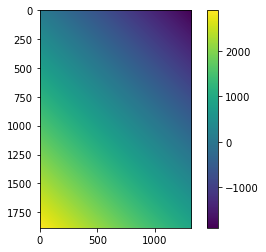

In [931]:
# Generate Pseudo DEM
xspan = np.abs(np.max(bounds[:,0]) - np.min(bounds[:,0]))
yspan = np.abs(np.max(bounds[:,1]) - np.min(bounds[:,1]))
dem = 7000*np.ones((2*int(yspan),2*int(xspan)))
for i in range(dem.shape[0]):
    for j in range(dem.shape[1]):
        dem[i,j] = 7000  + 150*i - 150*j
dem /= 100
print(dem.shape)
plt.imshow(dem)
plt.colorbar()
plt.show()

In [568]:
bounds

array([[ 522811.83615989, 3587804.42306106],
       [ 523467.68808476, 3587804.42306106],
       [ 523467.68808476, 3588748.25662288],
       [ 522811.83615989, 3588748.25662288]])

In [866]:
# Compute Affine Transformation Matrix
X1 = [0,0]
x1 = [np.min(bounds[:,0]),np.max(bounds[:,1])]

X2 = [0,dem.shape[1]-1]
x2 = [np.max(bounds[:,0]),np.max(bounds[:,1])]

X3 = [dem.shape[0]-1,0]
x3 = [np.min(bounds[:,0]),np.min(bounds[:,1])]

A = np.zeros((6,6))
A[0:3,2] = 1
A[3:,-1] = 1
A[0,0:2] = x1
A[3,3:-1] = x1
A[1,0:2] = x2
A[4,3:-1] = x2
A[2,0:2] = x3
A[5,3:-1] = x3

B = np.array([X1[0],X2[0],X3[0],X1[1],X2[1],X3[1]]).T

coefs = np.linalg.solve(A,B)
transform = np.array([
    coefs[:3],coefs[3:]
])
#transform[-1,-1] *= -1



In [1067]:
bm_dem = np.squeeze(np.load("/Users/franklyndunbar/Project/bluemountain_dem_array.npy"))
bm_dem_transform =  np.load("/Users/franklyndunbar/Project/bluemountain_dem_transform.npy")
import pdb
def index(location) -> np.ndarray:
    # Map from spatial coordinates to pesudo raster
    #append 1
    point = [location[0],location[1],1]
    index = bm_dem_transform@point
    index = index[:-1]

    return index.astype(int)

def sampleDEM(location) -> float:
  
    ind = index(location)
    return bm_dem[ind[0],ind[1]]


In [1068]:

raw_paths = technique.raw_paths(paths=dt.Pattern.empty_path_dict(),spacing=5,depth=5,heat_depth=10,side='left')
raw_paths.keys()

dict_keys(['heat', 'igniter', 'leg', 'geometry'])

In [1069]:
import pdb
import matplotlib.pyplot as plt
def get_arc(start,end,spacing,plot=False):
    # Get the local arc points from r,theta and real world coords along arc

    dpos = end - start
    r = np.linalg.norm((dpos))
    theta = np.arctan(dpos[1]/dpos[0])
    local_theta_start = np.arcsin((spacing/2*r)%1)
    theta_range = np.linspace(-1*local_theta_start,local_theta_start,100)
    
    # put span of angles back into igniter frame of ref
    
    x_y_global = np.asarray([[r*np.cos(x),r*np.sin(x)] + start for x in theta_range.tolist()])
    
 
    return theta_range, x_y_global


In [1088]:
from shapely.ops import unary_union
from shapely.geometry import LineString,Point
import matplotlib.pyplot as plt
igniter_spacing = 5
var_dem = 2
var_path = igniter_spacing/2
posteriors = {}
augmented_paths = {}

delta_distance = 5

igniters = np.unique(raw_paths["igniter"]).shape[0]
for heat in np.unique(raw_paths["heat"]):
    if heat == 0:
        for igniter in np.unique(raw_paths["igniter"]):
            pointindex = heat*igniters + igniter

            geometry = raw_paths["geometry"][pointindex]
            distances = np.arange(0,geometry.length,delta_distance)  
            points = [geometry.interpolate(distance).coords[0] for distance in distances.tolist()] + [geometry.boundary[1]]
            points = np.array([np.asarray(p) for p in points])
            

            for i in range(points.shape[0]-1):
                
                start = points[i,:]
                stop = points[i+1,:]
                dpos = stop - start
                r = np.linalg.norm((dpos))
                prior_mean = np.arctan(dpos[1]/dpos[0])
                prior_var = np.deg2rad(5)
             
                thetas,arc_points = get_arc(start,stop,igniter_spacing)
                sampled_elevs = [sampleDEM(x) for x in arc_points]
                start_elev = sampleDEM(start)
                weights = [np.abs(x - start_elev) + 1e-2 for x in sampled_elevs]
                weights = [(1/x) for x in weights] # Generate weights by their inverse of change in elevation
                weights /= np.sum(weights)
                lh_mean = thetas@weights
                lh_var = np.deg2rad(5)
                 
               
                # Compute posterior
                # https://stats.stackexchange.com/questions/538622/product-of-two-normal-distributions-for-bayes-rule-is-not-product-of-normal-ou
               
                post_mean = (lh_mean*lh_var + prior_mean*prior_var)/(prior_var + lh_var)
                post_var = 1 / (1/var_path + 1/var_dem)

                new_stop = dpos - r*np.array([np.cos(post_mean),np.sin(post_mean)]) 
            
                points[i+1:,:] += new_stop
         

            
            augmented_paths[heat,igniter] = points





In [1089]:
dpath = augmented_paths[0,0][-1] - augmented_paths[0,0][0]
angle = np.rad2deg(np.arctan(dpath[1]/dpath[0]))

print(dpath)
print(angle)


[633.09643393  -0.73193592]
-0.06624080947090663


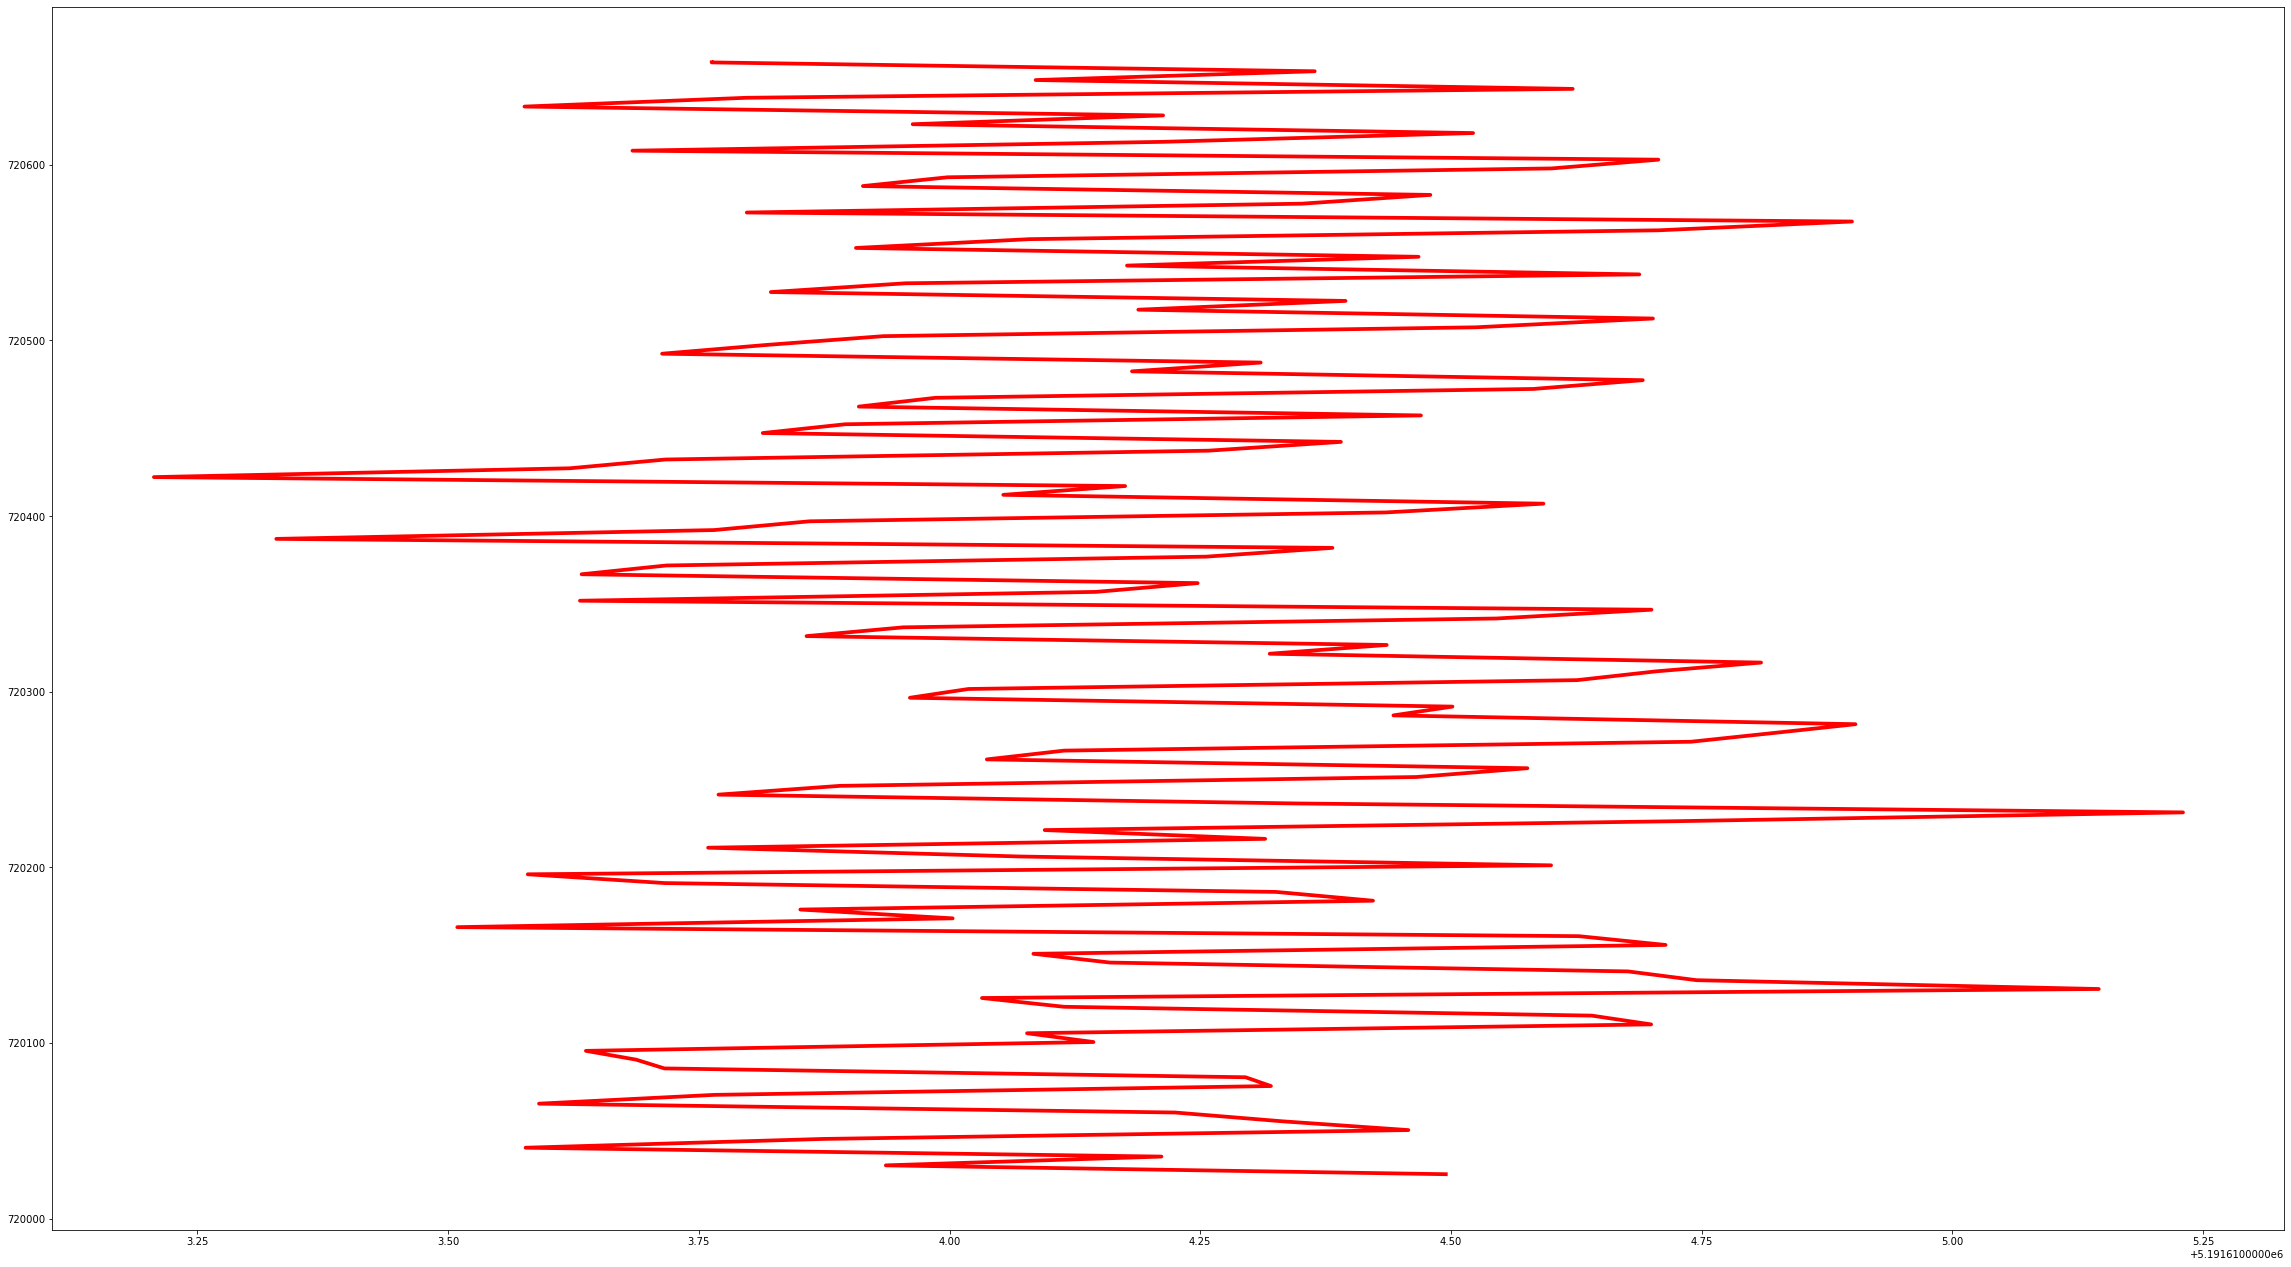

In [1090]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (160/4,90/4)
colors = ["r","b","c","k","y"]
for (h,i) in augmented_paths.keys():
    if h == 0 and i ==0:
        
        path = augmented_paths[h,i]
        #path = np.array([index(p) for p in path.tolist()])
        plt.plot(path[:,1],path[:,0],c=colors[i%5],linewidth=15/4)

#plt.imshow(dem[:500,::-1])
plt.show()

